<!-- This should be added to the overrides/main.html and improved-->
<div class="grid cards" markdown>

- <svg xmlns="http://www.w3.org/2000/svg" height="50" width="50" viewBox="0 0 488 512"><!--!Font Awesome Free 6.6.0 by @fontawesome - https://fontawesome.com License - https://fontawesome.com/license/free Copyright 2024 Fonticons, Inc.--><path fill="#2094F3" d="M488 261.8C488 403.3 391.1 504 248 504 110.8 504 0 393.2 0 256S110.8 8 248 8c66.8 0 123 24.5 166.3 64.9l-67.5 64.9C258.5 52.6 94.3 116.6 94.3 256c0 86.5 69.1 156.6 153.7 156.6 98.2 0 135-70.4 140.8-106.9H248v-85.3h236.1c2.3 12.7 3.9 24.9 3.9 41.4z"/></svg>
<a href="https://colab.research.google.com/github/AmbiqAI/heartkit/blob/main/docs/guides/train-ecg-denoiser.ipynb" class="md-content__button md-icon" style="color: #2094F3;">
    View in Colab
</a>

- <svg xmlns="http://www.w3.org/2000/svg" height="50" width="50" viewBox="0 0 496 512"><!--!Font Awesome Free 6.6.0 by @fontawesome - https://fontawesome.com License - https://fontawesome.com/license/free Copyright 2024 Fonticons, Inc.--><path fill="#2094F3" d="M165.9 397.4c0 2-2.3 3.6-5.2 3.6-3.3 .3-5.6-1.3-5.6-3.6 0-2 2.3-3.6 5.2-3.6 3-.3 5.6 1.3 5.6 3.6zm-31.1-4.5c-.7 2 1.3 4.3 4.3 4.9 2.6 1 5.6 0 6.2-2s-1.3-4.3-4.3-5.2c-2.6-.7-5.5 .3-6.2 2.3zm44.2-1.7c-2.9 .7-4.9 2.6-4.6 4.9 .3 2 2.9 3.3 5.9 2.6 2.9-.7 4.9-2.6 4.6-4.6-.3-1.9-3-3.2-5.9-2.9zM244.8 8C106.1 8 0 113.3 0 252c0 110.9 69.8 205.8 169.5 239.2 12.8 2.3 17.3-5.6 17.3-12.1 0-6.2-.3-40.4-.3-61.4 0 0-70 15-84.7-29.8 0 0-11.4-29.1-27.8-36.6 0 0-22.9-15.7 1.6-15.4 0 0 24.9 2 38.6 25.8 21.9 38.6 58.6 27.5 72.9 20.9 2.3-16 8.8-27.1 16-33.7-55.9-6.2-112.3-14.3-112.3-110.5 0-27.5 7.6-41.3 23.6-58.9-2.6-6.5-11.1-33.3 2.6-67.9 20.9-6.5 69 27 69 27 20-5.6 41.5-8.5 62.8-8.5s42.8 2.9 62.8 8.5c0 0 48.1-33.6 69-27 13.7 34.7 5.2 61.4 2.6 67.9 16 17.7 25.8 31.5 25.8 58.9 0 96.5-58.9 104.2-114.8 110.5 9.2 7.9 17 22.9 17 46.4 0 33.7-.3 75.4-.3 83.6 0 6.5 4.6 14.4 17.3 12.1C428.2 457.8 496 362.9 496 252 496 113.3 383.5 8 244.8 8zM97.2 352.9c-1.3 1-1 3.3 .7 5.2 1.6 1.6 3.9 2.3 5.2 1 1.3-1 1-3.3-.7-5.2-1.6-1.6-3.9-2.3-5.2-1zm-10.8-8.1c-.7 1.3 .3 2.9 2.3 3.9 1.6 1 3.6 .7 4.3-.7 .7-1.3-.3-2.9-2.3-3.9-2-.6-3.6-.3-4.3 .7zm32.4 35.6c-1.6 1.3-1 4.3 1.3 6.2 2.3 2.3 5.2 2.6 6.5 1 1.3-1.3 .7-4.3-1.3-6.2-2.2-2.3-5.2-2.6-6.5-1zm-11.4-14.7c-1.6 1-1.6 3.6 0 5.9 1.6 2.3 4.3 3.3 5.6 2.3 1.6-1.3 1.6-3.9 0-6.2-1.4-2.3-4-3.3-5.6-2z"/></svg>
<a href="https://github.com/AmbiqAI/heartkit/blob/main/docs/guides/train-ecg-denoiser.ipynb" class="md-content__button md-icon" style="color: #2094F3;">
    GitHub source
</a>

</div>

# Train ECG Denosier

__Date created:__ 2024/08/13 

__Last Modified:__ 2024/07/17 

__Description:__ Train, evaluate, and export ECG denoiser model from scratch


## Overview 

In this guide, we will train an ECG denoiser to remove noise and artifacts from raw ECG signals. 
Once trained, we demonstrate how to evaluate the model and export it for inference for both TF Lite and TF Lite for Micro.

__Input__

- **Sensor**: ECG 
- **Location**: Wrist
- **Sampling Rate**: 100 Hz
- **Frame Size**: 2.56 seconds

__Datasets__

- **[Synthetic](https://ambiqai.github.io/heartkit/datasets/synthetic/)**: Synthetic ECG signals from physioKIT
- **[PTB-XL](https://ambiqai.github.io/heartkit/datasets/ptbxl/)**: The PTB-XL is a large publicly available electrocardiography dataset. 
It contains 21837 clinical 12-lead ECGs from 18885 patients of 10 second length. The ECGs are sampled at 500 Hz and are annotated by up to two cardiologists.


In [1]:
!pip install -q --disable-pip-version-check heartkit

## Setup

In [2]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import contextlib
from pathlib import Path
import tempfile
import keras
import heartkit as hk
import numpy as np
import helia_edge as helia
import matplotlib.pyplot as plt

In [3]:
# Be sure to set the dataset path to the correct location
datasets_dir = Path(os.getenv("HK_DATASET_PATH", "./datasets"))

plot_theme = hk.utils.dark_theme
helia.utils.silence_tensorflow()
hk.utils.setup_plotting(plot_theme)
logger = helia.utils.setup_logger(__name__)

### Create preprocess/augmentation pipeline

Since our goal is to denoise ECG signals, we need to create an augmentation pipeline to generate noisy samples. 

We will leverage `helia-edge` preprocessing layers to create the following augmentations:

* Baseline wander: Simulate baseline wander by adding a low frequency sine signal
* Powerline noise: Simulate powerline noise by adding a 50 Hz sinusoidal signal 
* Amplitude warp: Simulate amplitude warp by randomly scaling along a low frequency sine wave
* Gaussian noise: Simulate lead noise by adding random noise following a Gaussian distribution
* Background noise: Add real noise captured from NSTDB dataset


In [4]:
preprocesses = [hk.NamedParams(name="layer_norm", params=dict(epsilon=0.01))]

augmentations = [
    hk.NamedParams(
        name="random_noise_distortion", params=dict(amplitude=[0.1, 1.5], frequency=[0.5, 1.5], name="baseline_wander")
    ),
    hk.NamedParams(
        name="random_sine_wave",
        params=dict(amplitude=[0, 0.05], frequency=[45, 50], auto_vectorize=False, name="powerline_noise"),
    ),
    hk.NamedParams(
        name="amplitude_warp", params=dict(amplitude=[0.9, 1.1], frequency=[0.5, 1.5], name="amplitude_warp")
    ),
    hk.NamedParams(name="random_noise", params=dict(factor=[0.1, 0.5], name="random_noise")),
    hk.NamedParams(name="random_background_noise", params=dict(amplitude=[0.1, 0.5], num_noises=2, name="nstdb")),
]

## Define TCN model architecture

For this task, we are going to leverage a customized __TCN__ model architecture that is smaller and can handle 1D signals. The model consists of 5 TCN blocks with a depth of 1. Each block leverages dilated depthwise-separable convolutions along with inverted expansion and squeeze and excitation layers. The model is followed by a 1D convolutional layer. 

In [5]:
mbconv_blocks = [
    dict(
        depth=1, branch=1, filters=16, kernel=(1, 7), dilation=(1, 1), dropout=0, ex_ratio=1, se_ratio=0, norm="batch"
    ),
    dict(
        depth=1, branch=1, filters=24, kernel=(1, 7), dilation=(1, 1), dropout=0, ex_ratio=1, se_ratio=2, norm="batch"
    ),
    dict(
        depth=1, branch=1, filters=32, kernel=(1, 7), dilation=(1, 2), dropout=0, ex_ratio=1, se_ratio=2, norm="batch"
    ),
    dict(
        depth=1, branch=1, filters=40, kernel=(1, 7), dilation=(1, 4), dropout=0, ex_ratio=1, se_ratio=2, norm="batch"
    ),
    dict(
        depth=1, branch=1, filters=48, kernel=(1, 7), dilation=(1, 8), dropout=0, ex_ratio=1, se_ratio=2, norm="batch"
    ),
]

architecture = dict(
    name="tcn",
    params=dict(
        input_kernel=(1, 7),
        input_norm="batch",
        blocks=mbconv_blocks,
        output_kernel=(1, 7),
        include_top=True,
        use_logits=True,
        model_name="tcn",
    ),
)

## Configure datasets

Capturing noise-free ECG signals is challenging due to the presence of various artifacts. Therefore, we use a combination of synthetic and controlled, real-world datasets as our training data. heartKIT exposes an ECG Synthetic dataset generator provided by physioKIT. 


In [6]:
datasets = [
    hk.NamedParams(
        name="ecg-synthetic",
        params=dict(
            num_pts=5000,
            params=dict(
                presets=["SR", "AFIB", "ant_STEMI", "LAHB", "LPHB", "high_take_off", "LBBB", "random_morphology"],
                preset_weights=[24, 8, 1, 1, 1, 1, 1, 0],
                duration=10,
                sample_rate=100,
                heart_rate=[40, 160],
                impedance=[1, 2],
                p_multiplier=[0.7, 1.3],
                t_multiplier=[0.7, 1.3],
                noise_multiplier=[0, 0.01],
                voltage_factor=[800, 1000],
            ),
        ),
    ),
    hk.NamedParams(
        name="ptbxl",
        params=dict(
            path=datasets_dir / "ptbxl",
        ),
    ),
]

## Task configuration

Here we provide the constants that we will use throughout the guide. For better performance, adjust parameters as needed such as `BATCH_SIZE`, `EPOCHS`, and `LEARNING_RATE`.

In [7]:
params = hk.HKTaskParams(
    # Common arguments
    name="hk-ecg-denoiser",
    job_dir=Path(tempfile.gettempdir()) / "hk-ecg-denoiser",
    # Dataset arguments
    datasets=datasets,
    # Signal arguments
    sampling_rate=100,
    frame_size=256,
    # Dataloader arguments
    samples_per_patient=5,
    val_samples_per_patient=10,
    test_samples_per_patient=10,
    # Preprocessing/Augmentation arguments
    preprocesses=preprocesses,
    augmentations=augmentations,
    # Class arguments
    num_classes=1,
    class_map={0: 0},
    class_names=["DENOISE"],
    # Split arguments
    val_patients=0.1,
    val_size=10000,
    test_size=10000,
    val_file="val.pkl",
    test_file="val.pkl",
    # Model arguments
    model_file="model.keras",
    architecture=architecture,
    # Training parameters
    lr_rate=1e-3,
    lr_cycles=1,
    batch_size=256,
    buffer_size=25000,
    epochs=100,
    steps_per_epoch=50,
    val_metric="loss",
    class_weights="balanced",
    # Evaluation arguments
    threshold=0.5,
    val_metric_threshold=0.98,
    # Export parameters
    tflm_var_name="ecg_denoise_flatbuffer",
    tflm_file="ecg_denoise_flatbuffer.h",
    # Demo params
    backend="pc",
    demo_size=800,
    display_report=True,
    # Extra arguments
    verbose=1,
    seed=42,
)

## Load denoise task 

heartKIT provides a __TaskFactory__ that includes a number ready-to-use tasks. Each task provides methods for training, evaluating, exporting, and demoing. We will grab the __denoise__ task and configure it for our use case.

In [8]:
task = hk.TaskFactory.get("denoise")

### Download the datasets

We will download the synthetic and PTB-XL datasets using `heartkit`. If already downloaded, this step will be skipped.

In [9]:
task.download(params=params)

## Visualize the data

Let's visualize a sample ECG signal from the synthetic dataset. Note this contains no noise or artifacts. Augmentations will be applied later to generate noisy samples for training.

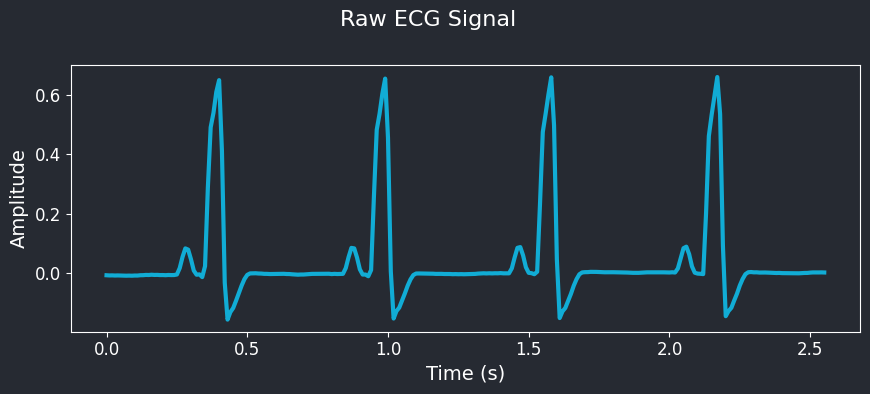

In [10]:
ds = hk.DatasetFactory.get(params.datasets[0].name)(cacheable=False, **params.datasets[0].params)

ds_gen = ds.signal_generator(
    patient_generator=helia.utils.uniform_id_generator(ds.get_test_patient_ids()),
    frame_size=params.frame_size,
    samples_per_patient=params.samples_per_patient,
    target_rate=params.sampling_rate,
)
ecg = next(ds_gen)

ts = np.arange(0, len(ecg)) / params.sampling_rate
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
ax.plot(ts, ecg, color=plot_theme.primary_color, lw=3)
fig.suptitle("Raw ECG Signal")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
fig.tight_layout()
fig.show()

### Visualize augmented data

Let's visualize the augmented data to understand how the augmentations affect the ECG signals.

In [11]:
preprocessor = hk.datasets.create_augmentation_pipeline(
    augmentations=params.preprocesses,
    sampling_rate=params.sampling_rate,
)

augmenter = hk.datasets.create_augmentation_pipeline(
    augmentations=params.augmentations,
    sampling_rate=params.sampling_rate,
)

I0000 00:00:1723838156.202266  751181 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723838156.222145  751181 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723838156.222246  751181 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723838156.223422  751181 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

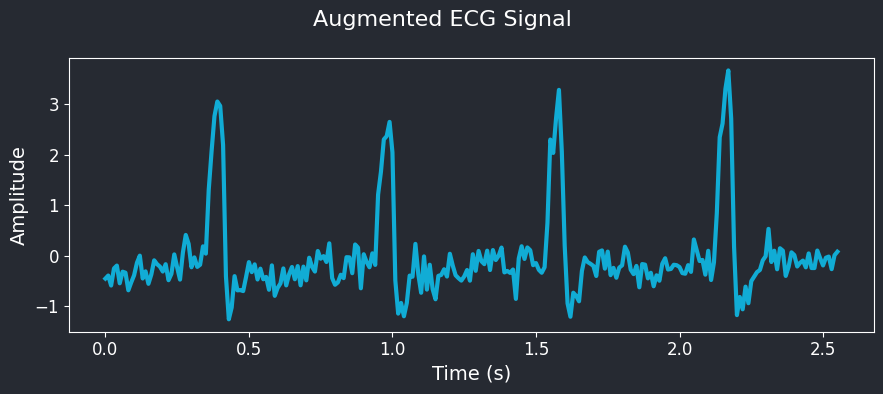

In [12]:
aug_ecg = augmenter(preprocessor(keras.ops.convert_to_tensor(np.reshape(ecg, (1, -1, 1)))), training=True)
aug_ecg = aug_ecg.numpy().squeeze()

ts = np.arange(0, len(aug_ecg)) / params.sampling_rate
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
plt.plot(ts, aug_ecg, color=plot_theme.primary_color, lw=3)
fig.suptitle("Augmented ECG Signal")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
plt.tight_layout()
plt.show()

## Visualize the model

Let's view the first several layers of the model to understand the architecture better.

In [13]:
model = helia.models.tcn.tcn_from_object(
    x=keras.Input(shape=(params.frame_size, 1), name="inputs"), params=architecture["params"], num_classes=1
)
model.summary(layer_range=("inputs", model.layers[10].name))

Model: "TCN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer) │ (None, 256, 1)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 256, 1) │          0 │ inputs[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ENC.CN              │ (None, 1, 256, 1) │          7 │ reshape[0][0]     │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ENC.BN              │ (None, 1, 256, 1) │          4 │ ENC.CN[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.DW.B1.CN      │ (None, 1, 256, 1) │          7 │ ENC.BN[0][0]      │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.DW.B1.BN      │ (None, 1, 256, 1) │          4 │ B1.D1.DW.B1.CN[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.DW.ACT        │ (None, 1, 256, 1) │          0 │ B1.D1.DW.B1.BN[0… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.PW.B1.CN      │ (None, 1, 256,    │         16 │ B1.D1.DW.ACT[0][… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.PW.B1.BN      │ (None, 1, 256,    │         64 │ B1.D1.PW.B1.CN[0… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.PW.ACT        │ (None, 1, 256,    │          0 │ B1.D1.PW.B1.BN[0… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B2.D1.DW.B1.CN      │ (None, 1, 256,    │        112 │ B1.D1.PW.ACT[0][… │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,223 (39.93 KB)

 Trainable params: 9,675 (37.79 KB)

 Non-trainable params: 548 (2.14 KB)

## Train the model

In [14]:
task.train(params)

INFO     Creating synthetic dataset cache with 5000 patients                                   ]8;id=172088;file:///workspaces/heartkit/heartkit/datasets/ecg_synthetic.py\ecg_synthetic.py]8;;\:]8;id=461477;file:///workspaces/heartkit/heartkit/datasets/ecg_synthetic.py#159\159]8;;\

Building ecg-synthetic cache: 100%|██████████| 5000/5000 [00:57<00:00, 86.91it/s] 


INFO     Validation steps per epoch: 39                                                              ]8;id=99779;file:///workspaces/heartkit/heartkit/tasks/denoise/datasets.py\datasets.py]8;;\:]8;id=277033;file:///workspaces/heartkit/heartkit/tasks/denoise/datasets.py#85\85]8;;\

Training:   0%|           0/100 ETA: ?s,  ?epochs/sWARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1723838225.604155  751478 service.cc:146] XLA service 0x7a52b8001f20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723838225.604174  751478 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
I0000 00:00:1723838232.858832  751478 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
Training: 100%|██████████ 100/100 ETA: 00:00s,   1.59s/epochs

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - cos: 0.7118 - loss: 0.0511 - mae: 0.1445 - mse: 0.0452 - snr: 11.9220


INFO     [VAL SET]COS=0.7079, LOSS=0.0528, MAE=0.1466, MSE=0.0469, SNR=11.9038                         ]8;id=347748;file:///workspaces/heartkit/heartkit/tasks/denoise/train.py\train.py]8;;\:]8;id=260161;file:///workspaces/heartkit/heartkit/tasks/denoise/train.py#149\149]8;;\

## Model evaluation

Now that we have trained the model, we will evaluate the model on the test dataset. Similar to training, we will provide the high-level configuration to the task process.

In [15]:
task.evaluate(params)

INFO     Creating synthetic dataset cache with 5000 patients                                   ]8;id=288389;file:///workspaces/heartkit/heartkit/datasets/ecg_synthetic.py\ecg_synthetic.py]8;;\:]8;id=256787;file:///workspaces/heartkit/heartkit/datasets/ecg_synthetic.py#159\159]8;;\

Building ecg-synthetic cache: 100%|██████████| 5000/5000 [00:57<00:00, 87.16it/s] 


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - cos: 0.7238 - loss: 0.0443 - mae: 0.1328 - mse: 0.0384 - snr: 12.3671


INFO     [TEST SET] COS=0.7245, LOSS=0.0437, MAE=0.1316, MSE=0.0377, SNR=12.3787                     ]8;id=893749;file:///workspaces/heartkit/heartkit/tasks/denoise/evaluate.py\evaluate.py]8;;\:]8;id=218337;file:///workspaces/heartkit/heartkit/tasks/denoise/evaluate.py#37\37]8;;\

## Export model to TF Lite / TFLM

Once we have trained and evaluated the model, we need to export the model into a format that can be used for inference on the edge. Currently, we export the model to TensorFlow Lite flatbuffer format. This will also generate a C header file that can be used with TensorFlow Lite for Microcontrollers (TFLM).

For this model, we will export as a 32-bit floating point model.
 
__NOTE:__ We utilize `CONCRETE` mode to lower the model to concrete functions before converting. This is because TF (MLIR) fails to properly lower the dilated convolutional layers.

In [16]:
quantization = hk.QuantizationParams(
    enabled=True,
    format="FP32",
    io_type="float32",
    conversion="CONCRETE",
)
params.quantization = quantization

In [18]:
# TF dumps a lot of info to stdout, so we redirect it to /dev/null
with open(os.devnull, "w") as devnull:
    with contextlib.redirect_stdout(devnull), contextlib.redirect_stderr(devnull):
        task.export(params)

INFO     Creating synthetic dataset cache with 5000 patients                                   ]8;id=313048;file:///workspaces/heartkit/heartkit/datasets/ecg_synthetic.py\ecg_synthetic.py]8;;\:]8;id=514688;file:///workspaces/heartkit/heartkit/datasets/ecg_synthetic.py#159\159]8;;\

[08/16/24 20:02:23] WARNING  WARNING:absl:Please consider providing the trackable_obj argument in the  ]8;id=520246;file:///workspaces/heartkit/.venv/lib/python3.12/site-packages/tensorflow/lite/python/lite.py\lite.py]8;;\:]8;id=384487;file:///workspaces/heartkit/.venv/lib/python3.12/site-packages/tensorflow/lite/python/lite.py#2166\2166]8;;\
                             from_concrete_functions. Providing without the trackable_obj argument is              
                             deprecated and it will use the deprecated conversion path.                            

INFO     Validating model results                                                                      ]8;id=941295;file:///workspaces/heartkit/heartkit/tasks/denoise/export.py\export.py]8;;\:]8;id=727514;file:///workspaces/heartkit/heartkit/tasks/denoise/export.py#83\83]8;;\

I0000 00:00:1723838543.688860  751181 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723838543.688944  751181 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
I0000 00:00:1723838543.689113  751181 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723838543.689169  751181 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing

INFO     [TF METRICS] LOSS=0.0396 MAE=0.1357 MSE=0.0396 RMSE=0.1991 COSINE=0.7178                      ]8;id=496666;file:///workspaces/heartkit/heartkit/tasks/denoise/export.py\export.py]8;;\:]8;id=35165;file:///workspaces/heartkit/heartkit/tasks/denoise/export.py#90\90]8;;\

INFO     [TFL METRICS] LOSS=0.0396 MAE=0.1357 MSE=0.0396 RMSE=0.1991 COSINE=0.7177                     ]8;id=70190;file:///workspaces/heartkit/heartkit/tasks/denoise/export.py\export.py]8;;\:]8;id=68341;file:///workspaces/heartkit/heartkit/tasks/denoise/export.py#91\91]8;;\

INFO     Validation passed (0.0000)                                                                    ]8;id=375015;file:///workspaces/heartkit/heartkit/tasks/denoise/export.py\export.py]8;;\:]8;id=497680;file:///workspaces/heartkit/heartkit/tasks/denoise/export.py#99\99]8;;\

## ECG Denoising Demo

Finally, we will demonstrate how to use the trained ECG denoiser model to remove noise and artifacts from raw ECG signals. We will load a sample ECG signal, add noise to it, and then denoise it using the trained model. We will visualize the original, noisy, and denoised ECG signals to compare the results.

In [19]:
model = helia.models.load_model(params.model_file)

In [30]:
ecg = next(ds_gen)
aug_ecg = (
    augmenter(preprocessor(keras.ops.convert_to_tensor(np.reshape(ecg, (1, -1, 1)))), training=True).numpy().squeeze()
)
clean_ecg = model.predict(np.reshape(aug_ecg, (1, -1, 1)))
snr = helia.metrics.Snr()
snr.update_state(ecg.reshape(1, -1, 1), aug_ecg.reshape(1, -1, 1))
aug_snr = snr.result().numpy()
snr.reset_state()
snr.update_state(ecg.reshape(1, -1, 1), clean_ecg.reshape(1, -1, 1))
clean_snr = snr.result().numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


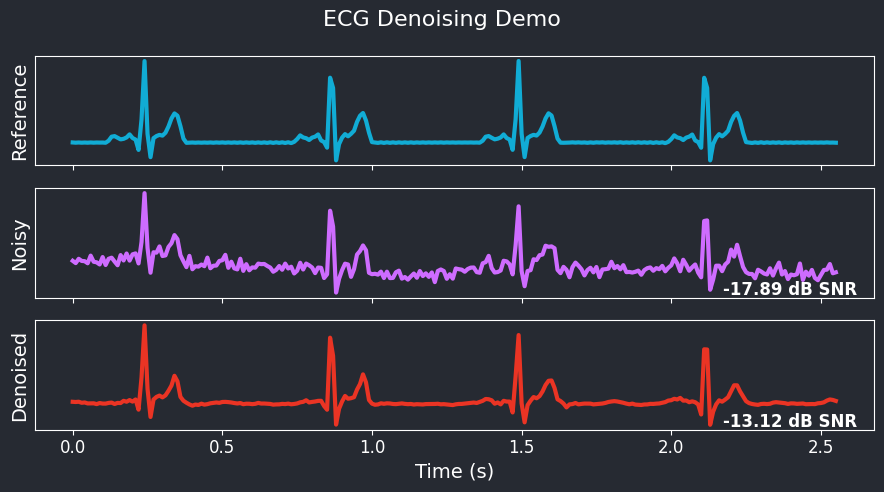

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(9, 5), sharex=True)
ax[0].plot(ts, ecg.squeeze(), color=plot_theme.primary_color, lw=3)
ax[1].plot(ts, aug_ecg.squeeze(), color=plot_theme.secondary_color, lw=3)
ax[2].plot(ts, clean_ecg.squeeze(), color=plot_theme.tertiary_color, lw=3)

ax[0].set_ylabel("Reference")
ax[1].set_ylabel("Noisy")
ax[2].set_ylabel("Denoised")

ax[1].text(0.98, 0.15, f"{aug_snr:4.02f} dB SNR", transform=ax[1].transAxes, ha="right", va="top", weight="bold")
ax[2].text(0.98, 0.15, f"{clean_snr:4.02f} dB SNR", transform=ax[2].transAxes, ha="right", va="top", weight="bold")
# Disable y-axis ticks for all plots
for axes in ax:
    axes.yaxis.set_ticks([])
ax[-1].set_xlabel("Time (s)")
fig.suptitle("ECG Denoising Demo")
fig.tight_layout()
fig.show()